In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv('./hotel.csv')

In [3]:
data.shape

(119390, 32)

In [4]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [7]:
#lead time : waktu dari Booking sampai dia check in
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [8]:
data.describe(include= object)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


In [9]:
def list_dtypes(df):
     categorical_list = []
     numerical_list = []
     for col in df.columns.tolist():
         if df[col].dtype=='object':
             categorical_list.append(col)
         else:
             numerical_list.append(col)
            
     return categorical_list, numerical_list

     print('Categorical Features : ', categorical_list)
     print('Numerical Features : ', numerical_list)



In [10]:
list_dtypes(data)

(['hotel',
  'arrival_date_month',
  'meal',
  'country',
  'market_segment',
  'distribution_channel',
  'reserved_room_type',
  'assigned_room_type',
  'deposit_type',
  'customer_type',
  'reservation_status',
  'reservation_status_date'],
 ['is_canceled',
  'lead_time',
  'arrival_date_year',
  'arrival_date_week_number',
  'arrival_date_day_of_month',
  'stays_in_weekend_nights',
  'stays_in_week_nights',
  'adults',
  'children',
  'babies',
  'is_repeated_guest',
  'previous_cancellations',
  'previous_bookings_not_canceled',
  'booking_changes',
  'agent',
  'company',
  'days_in_waiting_list',
  'adr',
  'required_car_parking_spaces',
  'total_of_special_requests'])

In [11]:
def check_unique(df,list_columns):
    entity = []
    for col in columns:
        unique_values = data[col].unique().tolist()
        entity.append(unique_values)
    mydict = dict(zip(columns,entity))
    result = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in mydict.items() ]))
    result = result.replace(np.nan, '', regex=True)
    display(result)

In [12]:
columns= data.columns
check_unique(data,columns )

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,,,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,City Hotel,1,737,2016,August,28,2,1,1,1,1,1,FB,GBR,Corporate,Corporate,1,1,1,A,A,4,Refundable,304,110,50,Contract,75.00,1,1,Canceled,2015-07-02
2,,,7,2017,September,29,3,2,2,3,2,2,HB,USA,Online TA,TA/TO,,2,2,D,D,0,Non Refund,240,113,47,Transient-Party,98.00,2,3,No-Show,2015-07-03
3,,,13,,October,30,4,4,3,4,10,10,SC,ESP,Offline TA/TO,Undefined,,3,3,E,E,1,,303,270,65,Group,107.00,8,2,,2015-05-06
4,,,14,,November,31,5,3,4,40,3,9,Undefined,IRL,Complementary,GDS,,26,4,G,G,2,,15,178,122,,103.00,3,4,,2015-04-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8874,,,,,,,,,,,,,,,,,,,,,,,,,,,,134.82,,,,
8875,,,,,,,,,,,,,,,,,,,,,,,,,,,,91.02,,,,
8876,,,,,,,,,,,,,,,,,,,,,,,,,,,,266.75,,,,
8877,,,,,,,,,,,,,,,,,,,,,,,,,,,,209.25,,,,


In [13]:
def missing_value(df):
    total_missing = []
    percentage_missing = []
    dimensions_missing = []
    dtypes_missing = []
    
    for col in df.columns:
        #dtypes
        dtypes = df[col].dtypes
        dtypes_missing.append(dtypes)
        #total data 
        n_rows = len(df)
        #total missing
        total = df[col].isnull().sum()
        total_missing.append(total)
        #percentage of missing
        percent = round((total/len(df))*100,2)
        percentage_missing.append(percent)
        #dimensions
        dimensions = len(df[col].unique())
        dimensions_missing.append(dimensions)
           
    missing_value = pd.DataFrame()
    missing_value['features'] = df.columns 
    missing_value['dtypes'] = dtypes_missing 
    missing_value['total data'] = n_rows
    missing_value['total missing'] = total_missing
    missing_value['precentage missing (%)'] = percentage_missing
    missing_value['dimension'] = dimensions_missing
    missing_value.sort_values(by = 'total missing', inplace= True, ascending = False)
    missing_value.reset_index(inplace = True, drop = True)
    display(missing_value)


In [14]:
missing_value(data)

,features,dtypes,total data,total missing,precentage missing (%),dimension
0,company,float64,119390,112593,94.31,353
1,agent,float64,119390,16340,13.69,334
2,country,object,119390,488,0.41,178
3,children,float64,119390,4,0.00,6
4,reserved_room_type,object,119390,0,0.00,10
5,assigned_room_type,object,119390,0,0.00,12
6,booking_changes,int64,119390,0,0.00,21
7,deposit_type,object,119390,0,0.00,3
8,hotel,object,119390,0,0.00,2
9,previous_cancellations,int64,119390,0,0.00,15


In [15]:
data.fillna(data['agent'].mean(),inplace= True)

In [16]:
data.fillna(data['country'].mode(),inplace= True)

In [17]:
data.fillna(data['children'].mode(),inplace= True)

In [18]:
df = data[['hotel', 'country', 'market_segment', 'distribution_channel', 'deposit_type', 'customer_type','adults',
          'children', 'babies','is_canceled','is_repeated_guest', 'days_in_waiting_list','total_of_special_requests', 
          'reserved_room_type','assigned_room_type','arrival_date_year','arrival_date_month']]
df2 = data[['hotel', 'country', 'customer_type', 'arrival_date_year', 'arrival_date_month', 'reserved_room_type', 'assigned_room_type']]
df3= data[['customer_type', 'distribution_channel','days_in_waiting_list','is_canceled']]

In [19]:
missing_value(df)

,features,dtypes,total data,total missing,precentage missing (%),dimension
0,hotel,object,119390,0,0.0,2
1,is_canceled,int64,119390,0,0.0,2
2,arrival_date_year,int64,119390,0,0.0,3
3,assigned_room_type,object,119390,0,0.0,12
4,reserved_room_type,object,119390,0,0.0,10
5,total_of_special_requests,int64,119390,0,0.0,6
6,days_in_waiting_list,int64,119390,0,0.0,128
7,is_repeated_guest,int64,119390,0,0.0,2
8,babies,int64,119390,0,0.0,5
9,country,object,119390,0,0.0,178


In [20]:
data["process"] = np.where(data["lead_time"] > 491 ,"Long", np.where(data["lead_time"] >= 245, "Medium", "Short"))

In [21]:
data['process']

0         Medium
1           Long
2          Short
3          Short
4          Short
           ...  
119385     Short
119386     Short
119387     Short
119388     Short
119389     Short
Name: process, Length: 119390, dtype: object

In [22]:
data[['hotel','process', 'customer_type']].groupby(['hotel','process'])['process'].agg(['count'])

count
hotel        process       
City Hotel   Long       482
             Medium   10173
             Short    68675
Resort Hotel Long        26
             Medium    3618
             Short    36416

In [23]:
pd.to_datetime(data["reservation_status_date"], format='%Y-%m-%d')

0        2015-07-01
1        2015-07-01
2        2015-07-02
3        2015-07-02
4        2015-07-03
            ...    
119385   2017-09-06
119386   2017-09-07
119387   2017-09-07
119388   2017-09-07
119389   2017-09-07
Name: reservation_status_date, Length: 119390, dtype: datetime64[ns]

In [24]:
pd.to_datetime(data["reservation_status_date"], format='%Y-%m-%d', errors = 'coerce')

0        2015-07-01
1        2015-07-01
2        2015-07-02
3        2015-07-02
4        2015-07-03
            ...    
119385   2017-09-06
119386   2017-09-07
119387   2017-09-07
119388   2017-09-07
119389   2017-09-07
Name: reservation_status_date, Length: 119390, dtype: datetime64[ns]

In [25]:
pd.to_datetime(data["reservation_status_date"], format='%Y-%m-%d', errors = 'coerce')

0        2015-07-01
1        2015-07-01
2        2015-07-02
3        2015-07-02
4        2015-07-03
            ...    
119385   2017-09-06
119386   2017-09-07
119387   2017-09-07
119388   2017-09-07
119389   2017-09-07
Name: reservation_status_date, Length: 119390, dtype: datetime64[ns]

In [26]:
reservation_2017 = data.loc[data["reservation_status_date"] > "2016-12-31"]

In [27]:
reservation_2017[['hotel','customer_type']].groupby('hotel').count()

,customer_type
hotel,
City Hotel,24115
Resort Hotel,12368


In [28]:
#VISUALISASI DATA KATEGORIKAL


In [29]:
data_group= df[['hotel','arrival_date_year']].groupby(['arrival_date_year']).count()
data_group

,hotel
arrival_date_year,
2015,21996
2016,56707
2017,40687


In [30]:
data_group['tahun']= list(data_group.index)
data_group.reset_index(drop=True,inplace=True)

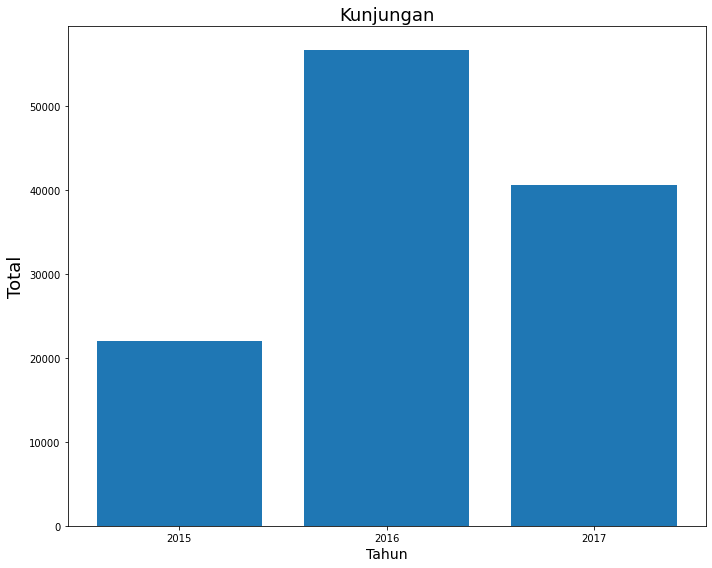

<Figure size 432x288 with 0 Axes>

In [31]:
x= np.arange(len(data_group['tahun']))
y= data_group['hotel']

plt.figure(figsize=(10,8))
plt.bar(x,y)
plt.title('Kunjungan', fontsize= 18)
plt.xlabel('Tahun', fontsize= 14)
plt.ylabel('Total', fontsize= 18)

plt.xticks(ticks=x, labels=data_group['tahun'])

plt.tight_layout()
plt.show()
plt.savefig("Total_kunjungan.jpeg")

In [32]:
dada= df[['arrival_date_year','hotel','customer_type']]
dada_pivot= pd.pivot_table(dada, index='arrival_date_year', columns='hotel', values='customer_type', aggfunc='count')
dada_pivot

hotel,City Hotel,Resort Hotel
arrival_date_year,,
2015,13682,8314
2016,38140,18567
2017,27508,13179


In [33]:
x_indexes = np.arange(len( dada_pivot.index))
print(x_indexes)
width = 0.25

[0 1 2]


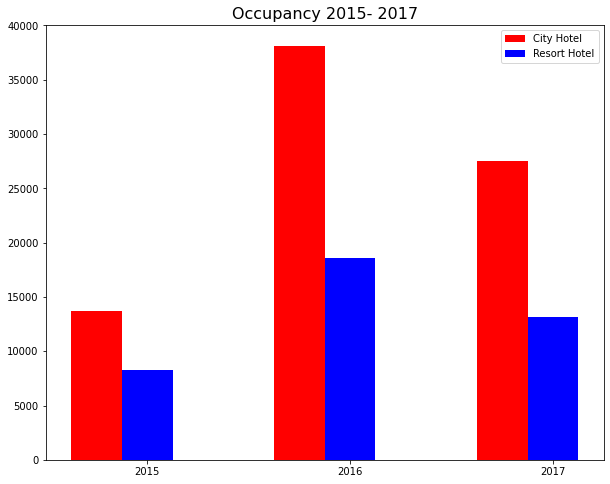

<Figure size 432x288 with 0 Axes>

In [34]:
p= x_indexes
q= dada_pivot['City Hotel']
r= dada_pivot['Resort Hotel']

plt.figure(figsize= (10,8))
plt.bar(p- width, q, width = width, color='r', label='City Hotel')
plt.bar(p, r, width = width, color='b', label='Resort Hotel')

plt.xticks(ticks=x_indexes, labels=dada_pivot.index)

plt.title('Occupancy 2015- 2017', fontsize= 16, loc= 'center')
plt.legend()
plt.show()
plt.savefig("Okupansi.png")

In [35]:

da= df2[['arrival_date_year','hotel','customer_type','arrival_date_month']]
da_pivot= pd.pivot_table(da, index=['arrival_date_year'], columns='customer_type', values='arrival_date_month', aggfunc='count')
da_pivot
# df2.columns

customer_type,Contract,Group,Transient,Transient-Party
arrival_date_year,,,,
2015,2658,192,11431,7715
2016,756,167,44391,11393
2017,662,218,33791,6016


[0 1 2]


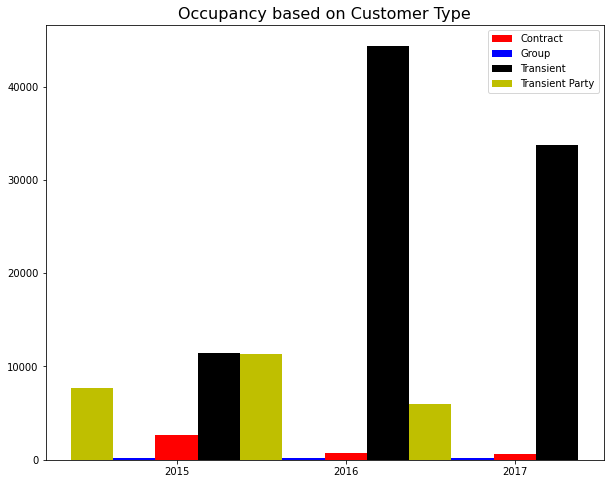

<Figure size 432x288 with 0 Axes>

In [36]:
x_ind = np.arange(len(da_pivot.index))
print(x_ind)
width = 0.25

p= x_ind
q= da_pivot['Contract']
r= da_pivot['Group']
s= da_pivot['Transient']
t= da_pivot['Transient-Party']

plt.figure(figsize= (10,8))
plt.bar(p+width, q, width = width, color='r', label='Contract')
plt.bar(p, r, width = width, color='b', label='Group')
plt.bar(p + width + width, s, width = width, color='k', label='Transient')
plt.bar(p - width, t, width = width, color='y', label='Transient Party')

plt.title('Occupancy based on Customer Type', fontsize= 16, loc="center")
plt.xticks(ticks=x_ind + width , labels=da_pivot.index)

plt.legend()
plt.show()
plt.savefig("Okupansi_Customer.png")
# plt.bar(da_pivot['Contract'])

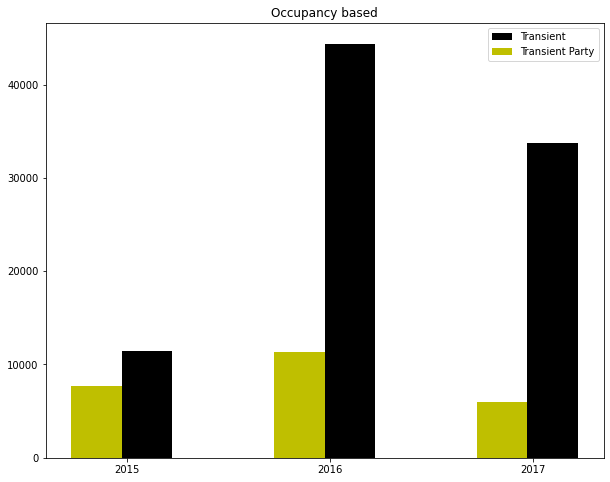

In [37]:
plt.figure(figsize= (10,8))
plt.bar(p + width, s, width = width, color='k', label='Transient')
plt.bar(p, t, width = width, color='y', label='Transient Party')

plt.xticks(ticks=x_ind + 0.15, labels=da_pivot.index)

plt.title("Occupancy based")
plt.legend()
plt.show()

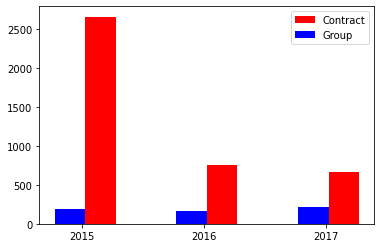

In [38]:
plt.bar(p+width, q, width = width, color='r', label='Contract')
plt.bar(p, r, width = width, color='b', label='Group')

plt.xticks(ticks=x_ind +0.1, labels=da_pivot.index)

plt.legend()
plt.show()

In [39]:
df2.columns

Index(['hotel', 'country', 'customer_type', 'arrival_date_year',
       'arrival_date_month', 'reserved_room_type', 'assigned_room_type'],
      dtype='object')

In [40]:
df_2015 = df2.loc[df2["arrival_date_year"] == 2015, ['country']]
df_2016 = df2.loc[df2["arrival_date_year"] == 2016, ['country']]
df_2017 = df2.loc[df2["arrival_date_year"] == 2017, ['country']]

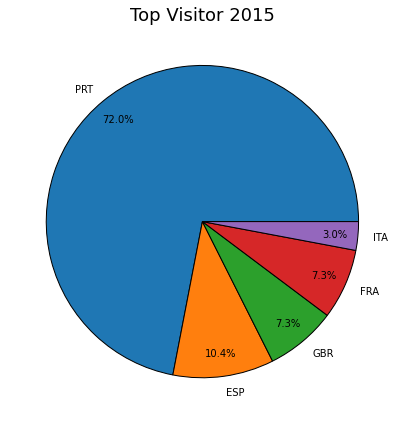

<Figure size 432x288 with 0 Axes>

In [41]:
from collections import Counter

negara_count= Counter(df_2015['country']).most_common(5)
nilai= []
list_negara=[]
for i in negara_count:
  nilai.append(i[1])
  list_negara.append(i[0])

# print(nilai)
# print(list_negara)

plt.figure(figsize=(8, 6))
plt.pie(nilai, labels= list_negara, startangle=0,
       autopct = '%1.1f%%',pctdistance=0.85, wedgeprops={'edgecolor': 'black'})

plt.title("Top Visitor 2015", fontsize= 18)
plt.tight_layout()
plt.show()
plt.savefig("Top_Visitor.png")

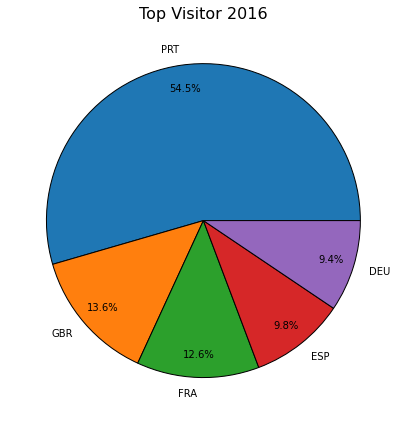

<Figure size 432x288 with 0 Axes>

In [42]:
negara_count= Counter(df_2016['country']).most_common(5)
nilai= []
list_negara=[]
for i in negara_count:
  nilai.append(i[1])
  list_negara.append(i[0])

plt.figure(figsize=(8, 6))
plt.pie(nilai, labels= list_negara, startangle=0,
       autopct = '%1.1f%%',pctdistance=0.85, wedgeprops={'edgecolor': 'black'}, labeldistance= 1.1)

plt.title("Top Visitor 2016", fontsize= 16)
plt.tight_layout()
plt.show()
plt.savefig("Top_Visitor2.png")

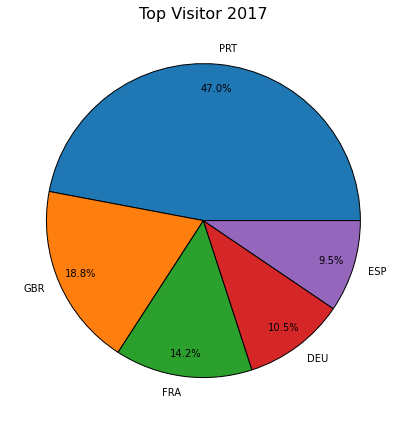

<Figure size 432x288 with 0 Axes>

In [43]:
negara_count= Counter(df_2017['country']).most_common(5)
nilai= []
list_negara=[]
for i in negara_count:
  nilai.append(i[1])
  list_negara.append(i[0])

plt.figure(figsize=(8, 6))
plt.pie(nilai, labels= list_negara, startangle=0,
       autopct = '%1.1f%%',pctdistance=0.85, wedgeprops={'edgecolor': 'black'})

plt.title("Top Visitor 2017", fontsize= 16)
plt.tight_layout()
plt.show()
plt.savefig("Top_Visitor3.png")

In [44]:
#general data berdasarkan hotel dan customer type

data_group1= df[['hotel','customer_type']].groupby('customer_type').count()
data_group1['customer']= list(data_group1.index)
data_group1.reset_index(drop=True,inplace=True)
data_group1=data_group1[['customer','hotel']]
data_group1.sort_values(by='hotel', ascending= False, inplace=True)


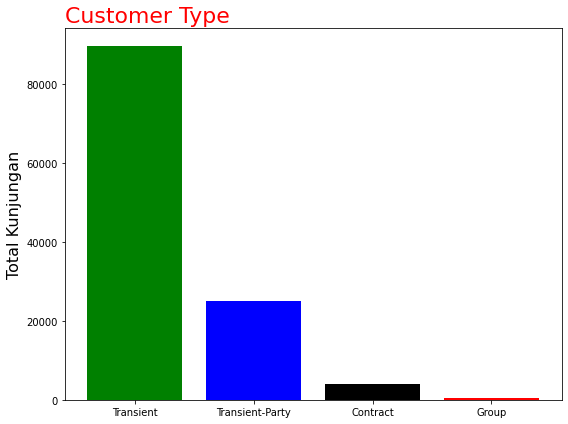

<Figure size 432x288 with 0 Axes>

In [45]:
x = data_group1['customer']
y = data_group1['hotel']
plt.figure(figsize=(8, 6))
plt.bar(x,y, color=['green', 'blue', 'black', 'red'])
        
plt.title('Customer Type', fontsize= 22, color='r',loc='left' )
# plt.xlabel('Total Kunjungan')
plt.ylabel('Total Kunjungan', fontsize= 16)

plt.tight_layout()
plt.show()
plt.savefig("customer_type.png")

In [46]:
data_group2= df[['hotel','reserved_room_type']].groupby('reserved_room_type').count()

In [47]:
data_group2['Reserved']= list(data_group2.index)

In [48]:
data_group2=data_group2[['Reserved','hotel']]
data_group2.reset_index(drop=True,inplace=True)
data_group2.sort_values(by=['hotel'], inplace=True, ascending=False)
data_group2


,Reserved,hotel
0,A,85994
3,D,19201
4,E,6535
5,F,2897
6,G,2094
1,B,1118
2,C,932
7,H,601
9,P,12
8,L,6


In [49]:
print(data_group2)

  Reserved  hotel
0        A  85994
3        D  19201
4        E   6535
5        F   2897
6        G   2094
1        B   1118
2        C    932
7        H    601
9        P     12
8        L      6


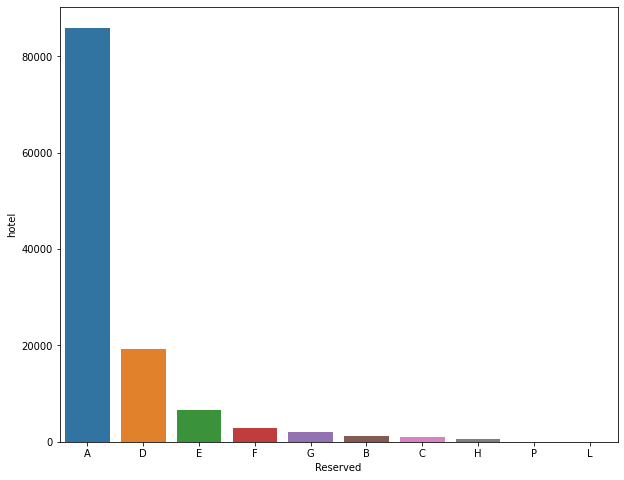

In [50]:
plt.figure(figsize=(10, 8))
sns.barplot(x ='Reserved',
            y = 'hotel',
            data = data_group2)
plt.show()

In [51]:
data_group3= df[['hotel','customer_type','is_repeated_guest', 'arrival_date_year']]

In [52]:
df["repeated"] = np.where(df["is_repeated_guest"]==0, 'tidak', 'ya')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [53]:
df.drop(columns= ['is_repeated_guest'], inplace= True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [54]:
data_group3= df[['hotel', 'repeated', 'arrival_date_year']].groupby(['hotel', 'repeated'])['hotel'].count()
data_group3

hotel         repeated
City Hotel    tidak       77298
              ya           2032
Resort Hotel  tidak       38282
              ya           1778
Name: hotel, dtype: int64

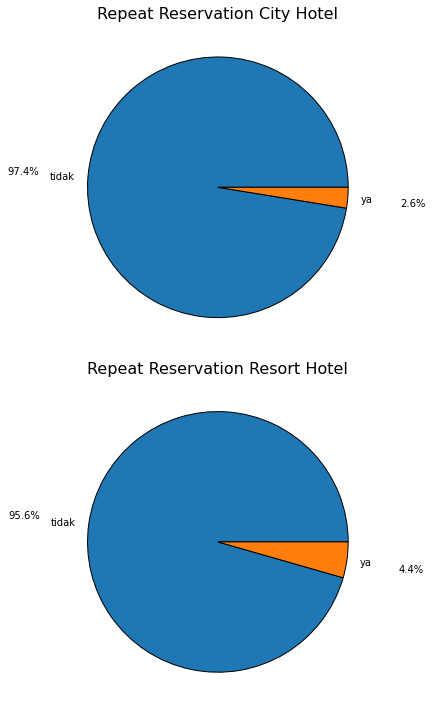

In [55]:
#MASUKIN DALAM PPT
fig, (ax1, ax2)= plt.subplots(2,1, figsize=(10,10))

ax1.pie(data_group3['City Hotel'], labels=['tidak','ya'], startangle=0, 
        autopct = '%1.1f%%', pctdistance=1.5, wedgeprops={'edgecolor': 'black'})

ax2.pie(data_group3['Resort Hotel'], labels=['tidak','ya'], startangle=0,
        autopct = '%1.1f%%', pctdistance=1.5, wedgeprops={'edgecolor': 'black'})


ax1.set_title("Repeat Reservation City Hotel", fontsize= 16)
ax2.set_title("Repeat Reservation Resort Hotel", fontsize= 16)

plt.tight_layout()
plt.show()


fig.savefig('fig1.png')


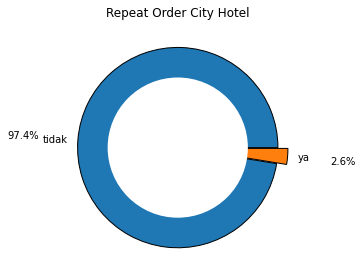

In [56]:
explode= [0, 0.1]
plt.pie(data_group3['City Hotel'], labels=['tidak','ya'],  explode=explode, startangle=0, 
        autopct = '%1.1f%%', pctdistance=1.55, wedgeprops={'edgecolor': 'black'})

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Repeat Order City Hotel")
plt.tight_layout()
plt.show()

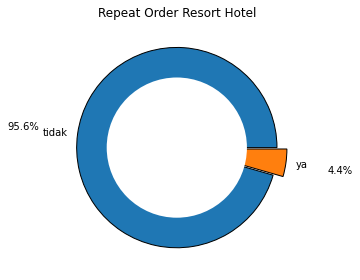

In [57]:
explode= [0, 0.1]
plt.pie(data_group3['Resort Hotel'], labels=['tidak','ya'],  explode=explode, startangle=0, 
        autopct = '%1.1f%%', pctdistance=1.55, wedgeprops={'edgecolor': 'black'})

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Repeat Order Resort Hotel")
plt.tight_layout()
plt.show()

In [58]:
data_group3.head()

hotel         repeated
City Hotel    tidak       77298
              ya           2032
Resort Hotel  tidak       38282
              ya           1778
Name: hotel, dtype: int64

In [59]:
#customer yang repeat order berdasarkan hotel
data_group3= df[['hotel','customer_type','repeated', 'arrival_date_year']]
pivot_data3_table= data_group3.pivot_table(values= 'arrival_date_year', index= 'repeated', columns='hotel', aggfunc='count')
pivot_data3_table

hotel,City Hotel,Resort Hotel
repeated,,
tidak,77298,38282
ya,2032,1778


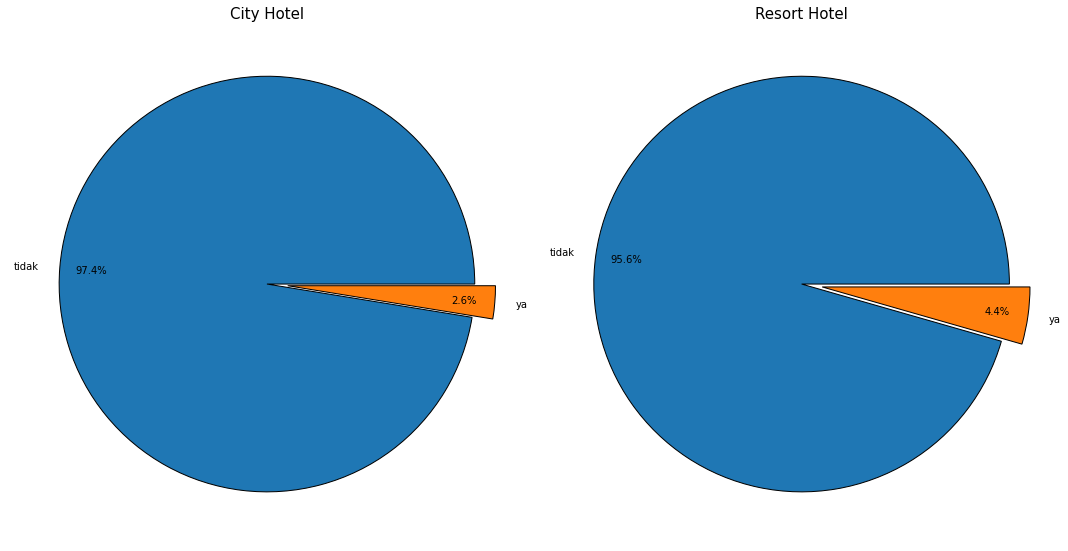

In [60]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,15))

ax1.pie(pivot_data3_table['City Hotel'], labels=pivot_data3_table.index, explode=explode, startangle=0,
       autopct = '%1.1f%%',pctdistance=0.85, wedgeprops={'edgecolor': 'black'})

ax2.pie(pivot_data3_table['Resort Hotel'], labels=pivot_data3_table.index, explode=explode, startangle=0,
       autopct = '%1.1f%%',pctdistance=0.85, wedgeprops={'edgecolor': 'black'})

ax1.set_title('City Hotel', fontsize=15)
ax2.set_title('Resort Hotel', fontsize=15)

# centre_circle = plt.Circle((0,0),0.70,fc='white')
# fig = plt.gcf()
# fig.gca().add_artist(centre_circle)

plt.tight_layout()
plt.show()

fig.savefig('fig2.png')

In [61]:
#PAKE COMBINE CHART

In [62]:
data_group4= df[['hotel','customer_type','is_canceled']].groupby(['hotel','is_canceled'])['is_canceled'].count()


In [63]:
df["canceled"] = np.where(df["is_canceled"]==0, 'tidak', 'ya')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [64]:
df.drop(columns= ['is_canceled'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [65]:
data_group4= df[['hotel', 'canceled', 'arrival_date_year', 'customer_type']]

#bookingan yang cancel berdasarkan tipe hotel

In [66]:
d4_pivot= pd.pivot_table(data_group4, index=['canceled'], columns='hotel', values='customer_type', aggfunc='count')
d4_pivot


hotel,City Hotel,Resort Hotel
canceled,,
tidak,46228,28938
ya,33102,11122


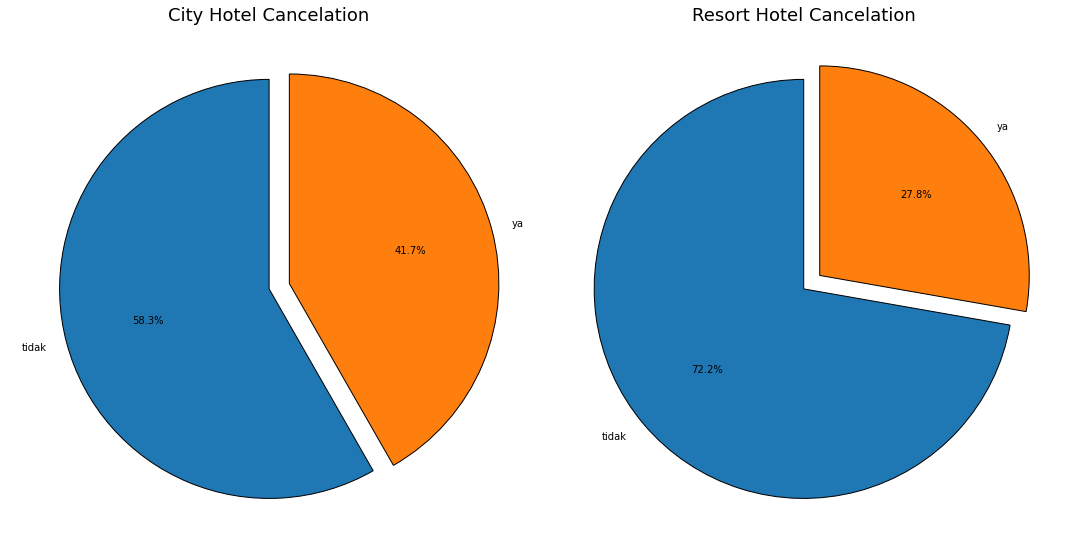

In [67]:
#MASUKIN KE PPT
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,15))
ax1.pie(d4_pivot['City Hotel'], labels= (['tidak', 'ya',]),explode=explode, startangle=90,  autopct = '%1.1f%%',
        wedgeprops={'edgecolor': 'black'})

ax2.pie(d4_pivot['Resort Hotel'], labels= (['tidak', 'ya']), explode=explode, startangle=90,  autopct = '%1.1f%%',
        wedgeprops={'edgecolor': 'black'})


ax1.set_title('City Hotel Cancelation', fontsize=18)
ax2.set_title('Resort Hotel Cancelation', fontsize=18)


plt.tight_layout()
plt.show()

fig.savefig('fig3.png')

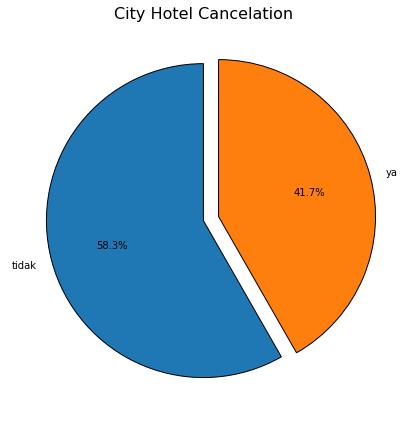

In [68]:
explode= [0, .1]
plt.figure(figsize=(8,6))
plt.pie(d4_pivot['City Hotel'], labels= (['tidak', 'ya',]), explode=explode, startangle=90,  autopct = '%1.1f%%',
        wedgeprops={'edgecolor': 'black'})


plt.title("City Hotel Cancelation", fontsize= 16)
plt.tight_layout()
plt.show()

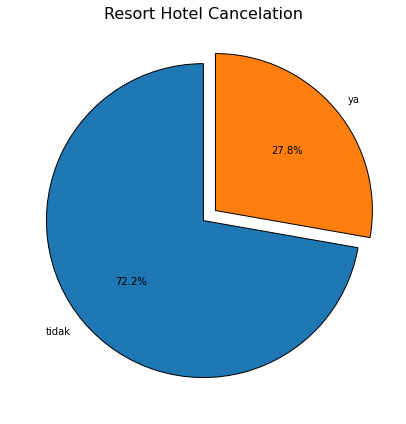

In [69]:
explode= [0, 0.1]

plt.figure(figsize=(8,6))
plt.pie(d4_pivot['Resort Hotel'], labels= (['tidak', 'ya']), explode=explode, startangle=90,  autopct = '%1.1f%%',
        wedgeprops={'edgecolor': 'black'})


plt.title("Resort Hotel Cancelation", fontsize= 16)
plt.tight_layout()
plt.show()

In [70]:
data_group5= df[['hotel','days_in_waiting_list','canceled']].groupby(['hotel','canceled'])['days_in_waiting_list'].agg(['mean'])
data_group5
#orang yang cancel itu rata-rata nunggu di waiting list kalau sampai 5 hari, khusus city hotel, 
#orang yang mesan city hotel bisa dibiang dapat menunggu hingga 3 hari, dan rata2 tunggu hingga 2 hari
#resort hotel masih considerable

mean
hotel        canceled          
City Hotel   tidak     2.150082
             ya        4.730409
Resort Hotel tidak     0.694934
             ya        0.092789

In [71]:
data_group6= df[['hotel','deposit_type','canceled','days_in_waiting_list']].groupby(['deposit_type','canceled'])['days_in_waiting_list'].count()

data_group6
#Bikinpresentase
#Hotel yang cancel berdasarkan tipe deposit

deposit_type  canceled
No Deposit    tidak       74947
              ya          29694
Non Refund    tidak          93
              ya          14494
Refundable    tidak         126
              ya             36
Name: days_in_waiting_list, dtype: int64

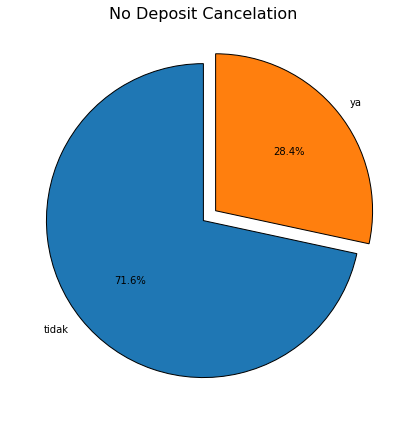

<Figure size 432x288 with 0 Axes>

In [72]:
plt.figure(figsize=(8,6))
plt.pie(data_group6['No Deposit'], labels=data_group6['No Deposit'].index,explode=explode, startangle=90,  autopct = '%1.1f%%',
        wedgeprops={'edgecolor': 'black'})

plt.title("No Deposit Cancelation", fontsize= 16)
plt.tight_layout()
plt.show()
plt.savefig('fig4.png')

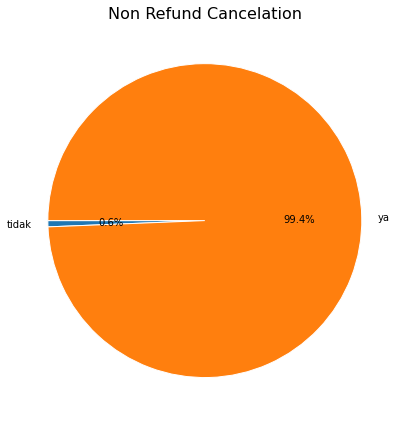

<Figure size 432x288 with 0 Axes>

In [73]:
plt.figure(figsize=(8,6))
plt.pie(data_group6['Non Refund'], labels=data_group6['Non Refund'].index, startangle=180,  autopct = '%1.1f%%',
        wedgeprops={'edgecolor': 'white'})

plt.title("Non Refund Cancelation", fontsize= 16)
plt.tight_layout()
plt.show()

plt.savefig('fig5.png')

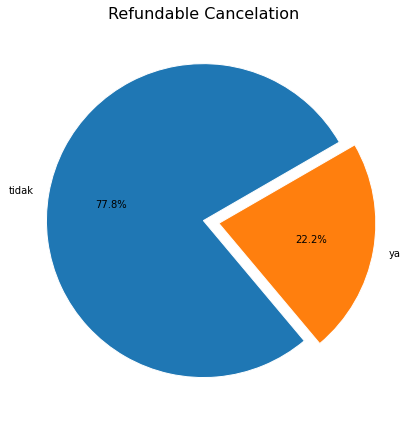

<Figure size 432x288 with 0 Axes>

In [74]:
plt.figure(figsize=(8,6))
plt.pie(data_group6['Refundable'], labels=data_group6['Refundable'].index,explode=explode, startangle=30,  autopct = '%1.1f%%',
        wedgeprops={'edgecolor': 'white'})

plt.title("Refundable Cancelation", fontsize= 16)
plt.tight_layout()
plt.show()

plt.savefig('fig6.png')

In [75]:
data_group7= df[['hotel','deposit_type','canceled','days_in_waiting_list', 'reserved_room_type']].groupby(['hotel','canceled'])['days_in_waiting_list'].agg(['mean'])
data_group7[:]

mean
hotel        canceled          
City Hotel   tidak     2.150082
             ya        4.730409
Resort Hotel tidak     0.694934
             ya        0.092789

In [76]:
#Cancelation in

In [77]:
data_2015 =df.loc[df["arrival_date_year"] == 2015, ['hotel','deposit_type','canceled','days_in_waiting_list', 'reserved_room_type']]
data_2015= data_2015.groupby(['hotel','canceled'])['days_in_waiting_list'].count()

data_2016 =df.loc[df["arrival_date_year"] == 2016, ['hotel','deposit_type','canceled','days_in_waiting_list', 'reserved_room_type']]
data_2016= data_2016.groupby(['hotel','canceled'])['days_in_waiting_list'].count()

data_2017 =df.loc[df["arrival_date_year"] == 2017, ['hotel','deposit_type','canceled','days_in_waiting_list', 'reserved_room_type']]
data_2017= data_2017.groupby(['hotel','canceled'])['days_in_waiting_list'].count()

In [78]:
#City Hotel
cancel= [data_2015['City Hotel']['ya'], data_2016['City Hotel']['ya'], data_2017['City Hotel']['ya']]
tahun= np.arange(len(data_group['tahun']))

In [79]:
#Resort Hotel
cancel2= [data_2015['Resort Hotel']['ya'], data_2016['Resort Hotel']['ya'], data_2017['Resort Hotel']['ya']]
tahun2= np.arange(len(data_group['tahun']))

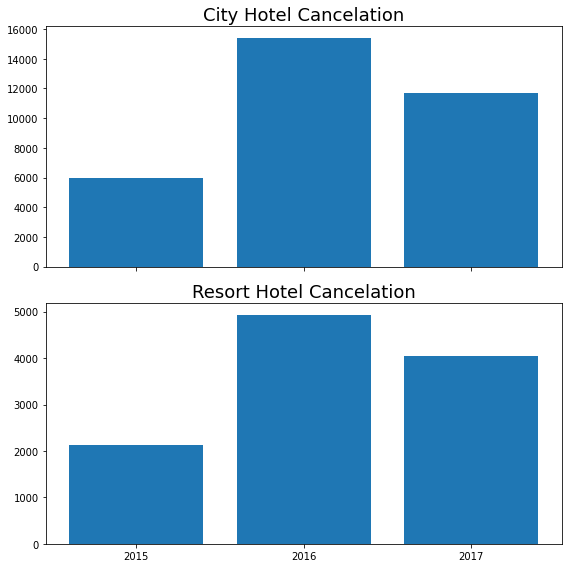

In [80]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,8), sharex= True)
ax1.bar(tahun, cancel)
ax2.bar(tahun2, cancel2)

x = np.arange(len(da_pivot.index))
ax1.set_title('City Hotel Cancelation', fontsize=18)


ax2.set_title('Resort Hotel Cancelation', fontsize=18)
plt.xticks(ticks=x, labels=[2015, 2016, 2017])


plt.tight_layout()
plt.show()
fig.savefig('fig7.png')

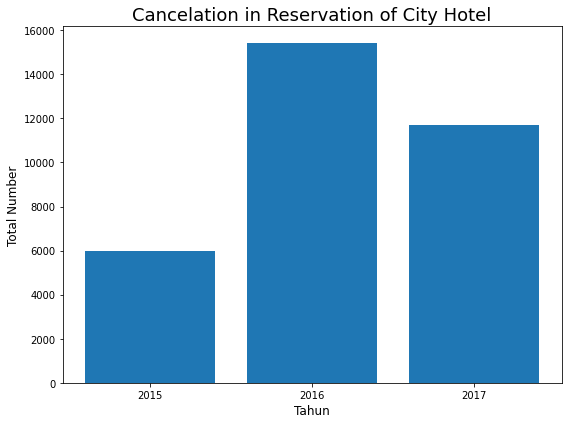

In [81]:
plt.figure(figsize=(8,6))
plt.bar(tahun, cancel)

plt.title('Cancelation in Reservation of City Hotel', fontsize= 18)
plt.xlabel('Tahun', fontsize= 12)
plt.ylabel('Total Number', fontsize= 12)

plt.xticks(ticks=x, labels=[2015, 2016, 2017])
plt.tight_layout()
plt.show()

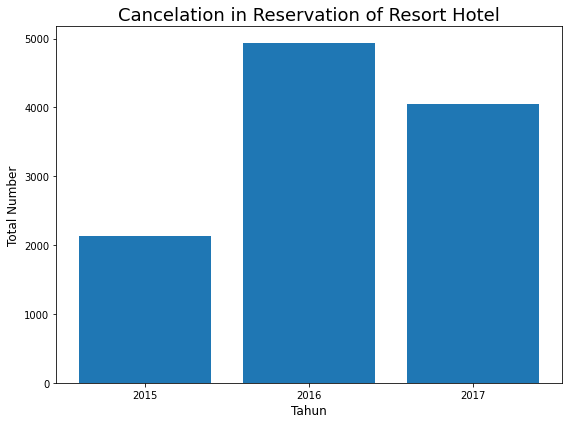

In [82]:
plt.figure(figsize=(8,6))
plt.bar(tahun2, cancel2)

plt.title('Cancelation in Reservation of Resort Hotel', fontsize= 18)
plt.xlabel('Tahun', fontsize= 12)
plt.ylabel('Total Number', fontsize= 12)

plt.xticks(ticks=x, labels=[2015, 2016, 2017])
plt.tight_layout()
plt.show()

In [83]:
df['lead_time']= data['lead_time']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [84]:
data_group8= df[['hotel','lead_time']]

In [85]:
data_2015 =df.loc[df["arrival_date_year"] == 2015, ['hotel','deposit_type','arrival_date_month','days_in_waiting_list', 'reserved_room_type', 'customer_type']]
data_2016 =df.loc[df["arrival_date_year"] == 2016, ['hotel','deposit_type','arrival_date_month','days_in_waiting_list', 'reserved_room_type','customer_type']]
data_2017 =df.loc[df["arrival_date_year"] == 2017, ['hotel','deposit_type','arrival_date_month','days_in_waiting_list', 'reserved_room_type','customer_type']]

In [86]:
hotel_2015 =data_2015[['hotel','arrival_date_month']].groupby('arrival_date_month').count()
hotel_2016 =data_2016[['hotel','arrival_date_month']].groupby('arrival_date_month').count()
hotel_2017 =data_2017[['hotel','arrival_date_month']].groupby('arrival_date_month').count()


In [87]:
hotel_2015['bulan']= list(hotel_2015.index)
hotel_2015= hotel_2015[['bulan','hotel']]
hotel_2015.reset_index(drop=True,inplace=True)
hotel_2015.sort_values(by=['hotel'], inplace=True, ascending=False)
hotel_2015

,bulan,hotel
5,September,5114
4,October,4957
0,August,3889
1,December,2920
2,July,2776
3,November,2340


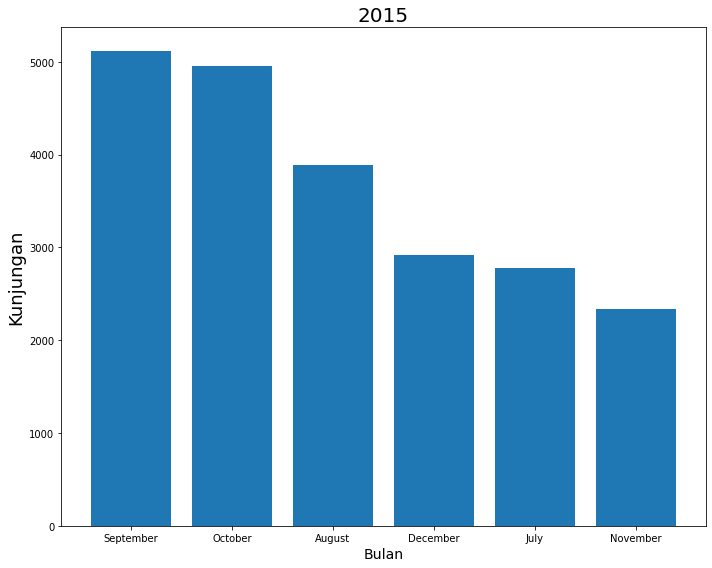

In [88]:
x= np.arange(len(hotel_2015['bulan']))
y= hotel_2015['hotel']

plt.figure(figsize=(10,8))
plt.bar(x,y)
plt.title('2015', fontsize= 20)
plt.xlabel('Bulan', fontsize= 14)
plt.ylabel('Kunjungan', fontsize= 18)

plt.xticks(ticks=x, labels=hotel_2015['bulan'])

plt.tight_layout()
plt.show()
fig.savefig('fig8.png')


In [89]:
hotel_2016['bulan']= list(hotel_2016.index)
hotel_2016= hotel_2016[['bulan','hotel']]
hotel_2016.reset_index(drop=True,inplace=True)
hotel_2016.sort_values(by=['hotel'], inplace=True, ascending=False)
hotel_2016

,bulan,hotel
10,October,6203
8,May,5478
0,April,5428
11,September,5394
6,June,5292
1,August,5063
7,March,4824
5,July,4572
9,November,4454
3,February,3891


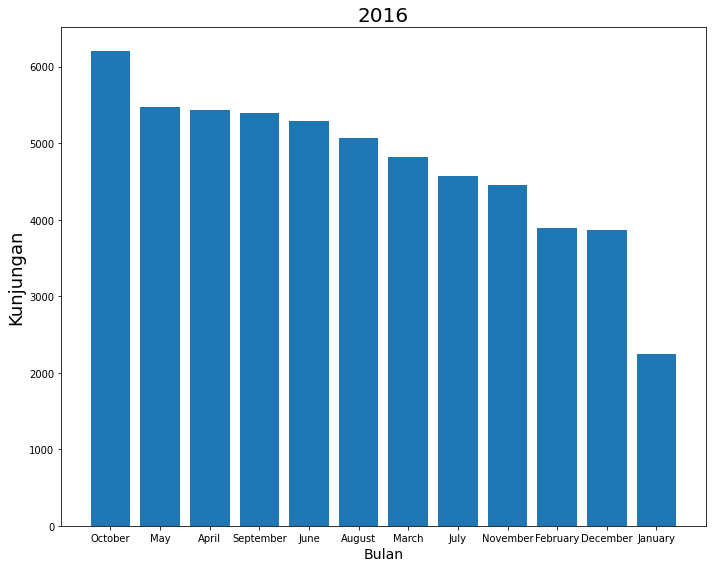

In [90]:
x= np.arange(len(hotel_2016['bulan']))
y= hotel_2016['hotel']

plt.figure(figsize=(10,8))
plt.bar(x,y)
plt.title('2016', fontsize= 20)
plt.xlabel('Bulan', fontsize= 14)
plt.ylabel('Kunjungan', fontsize= 18)

plt.xticks(ticks=x, labels=hotel_2016['bulan'])

plt.tight_layout()
plt.show()
fig.savefig('fig9.png')

In [91]:
hotel_2017['bulan']= list(hotel_2017.index)
hotel_2017= hotel_2017[['bulan','hotel']]
hotel_2017.reset_index(drop=True,inplace=True)
hotel_2017.sort_values(by=['hotel'], inplace=True, ascending=False)
hotel_2017

,bulan,hotel
7,May,6313
0,April,5661
5,June,5647
4,July,5313
6,March,4970
1,August,4925
2,February,4177
3,January,3681


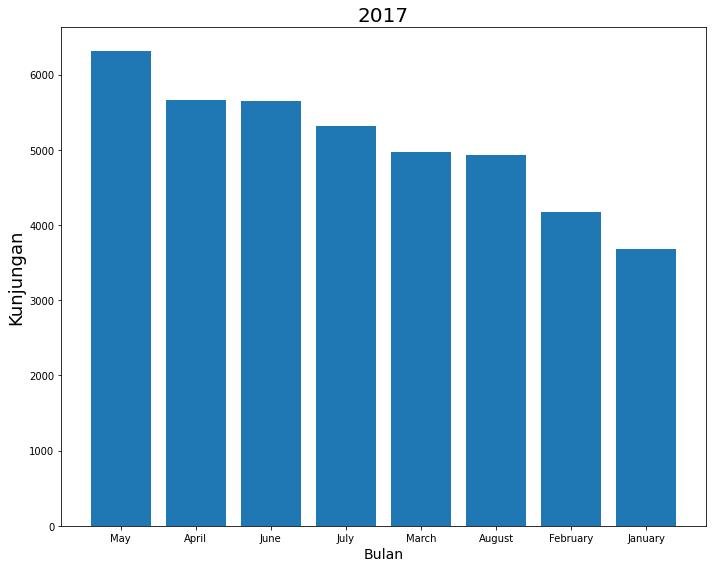

In [92]:
x= np.arange(len(hotel_2017['bulan']))
y= hotel_2017['hotel']

plt.figure(figsize=(10,8))
plt.bar(x,y)
plt.title('2017', fontsize= 20)
plt.xlabel('Bulan', fontsize= 14)
plt.ylabel('Kunjungan', fontsize= 18)

plt.xticks(ticks=x, labels=hotel_2017['bulan'])

plt.tight_layout()
plt.show()
fig.savefig('fig10.png')
